B0822012 邱元肇 HW2

長庚大學 資工系/人工智慧學程 樣形識別/深度學習 課程使用之教材及示範程式 Ch02

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data() #(X_train, Y_train), (X_test, Y_test)

MNIST (Mixed National Institute of Standards and Technology)資料集是 Yann Lecun's 提供的圖片資料庫，包含60,000張手寫數字圖片(Handwritten Digit Image)的訓練資料，和10,000張測試資料。

MNIST資料集是成對的數字手寫圖片和對應的標籤資料，其簡單說明如下所示：
*   __手寫數字圖片：__ 尺寸 28x28 像素的灰階點陣圖
*   __標籤：__ 手寫數字圖片對應實際的 0~9 數字

In [3]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
print(xr[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
x= xr[0]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

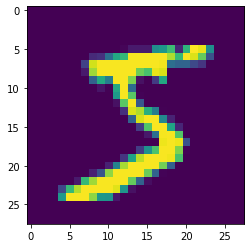

In [6]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [7]:
y= yr[0]
print(f'{y= }')

y= 5


In [8]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28) 
print(xr1,xr1.shape)
print(xt1,xt1.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (60000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (10000, 784)


In [9]:
# 建立神經層 784-100-10
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)   
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy', # sparse單標籤多元分類
    metrics= ['accuracy'] #準確度(適用分類問題)
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度 loss, accuracy = model.evaluate(X_train, Y_train)
#輸出(loss, accuracy)
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 11.0985 - accuracy: 0.1432
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 9.7700 - accuracy: 0.2081
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 9.7427 - accuracy: 0.2027
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 8.7097 - accuracy: 0.2695
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0187 - accuracy: 0.4120
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0298 - accuracy: 0.4043
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0402 - accuracy: 0.3728
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 2.2181 - accuracy: 0.4111
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0708 - accuracy: 0.4348
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 2.2220 - accuracy: 0.423

[2.2219693660736084, 0.4235999882221222]

In [10]:
# 建立神經層 784-100-10，隱藏層使用sigmoid 
#心得：準確度無明顯提升，因sigmoid函數進行反向傳播演算法時，會有梯度消失問題，訓練效果仍不佳
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'sigmoid'),    
    keras.layers.Dense(10)   
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy', # sparse單標籤多元分類
    metrics= ['accuracy'] #準確度(適用分類問題)
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 2.3750 - accuracy: 0.3615
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0769 - accuracy: 0.3735
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0468 - accuracy: 0.3600
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0569 - accuracy: 0.3805
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0745 - accuracy: 0.4082
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0861 - accuracy: 0.4273
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 2.0085 - accuracy: 0.4459
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 2.1110 - accuracy: 0.4435
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 2.0766 - accuracy: 0.4398
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 2.1111 - accuracy: 0.4916

[2.111117362976074, 0.49160000681877136]

In [11]:
# 建立神經層 784-100-10，隱藏層使用sigmoid，輸出層使用sigmoid
#心得：準確度大幅上升，輸出層改用sigmoid函數取代預設的線性函數
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'sigmoid'),    
    keras.layers.Dense(10,  activation= 'sigmoid')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy', # sparse單標籤多元分類
    metrics= ['accuracy'] #準確度(適用分類問題)
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5630 - accuracy: 0.8490
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.9143
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2554 - accuracy: 0.9231
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2352 - accuracy: 0.9293
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2175 - accuracy: 0.9347
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2050 - accuracy: 0.9378
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1983 - accuracy: 0.9397
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1926 - accuracy: 0.9422
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1864 - accuracy: 0.9438
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9435

[0.18561671674251556, 0.9434999823570251]

In [12]:
# 建立神經層 784-100-10，隱藏層使用relu，輸出層使用sigmoid
#心得：準確度再次上升，隱藏層改用線性整流函式，能最小化反向傳播時的訊號損失
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(10,  activation= 'sigmoid')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy', # sparse單標籤多元分類
    metrics= ['accuracy'] #準確度(適用分類問題)
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 3.9723 - accuracy: 0.8587
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4957 - accuracy: 0.9194
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.9400
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2940 - accuracy: 0.9503
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.9572
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9622
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.9643
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1933 - accuracy: 0.9667
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1803 - accuracy: 0.9689
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.9584

[0.4474130868911743, 0.9584000110626221]

In [13]:
# 建立神經層 784-100-10，隱藏層使用relu，輸出層使用softmax
#心得1：準確度不受影響，輸出層改用softmax，和先前使用sigmoid意義相同，只是輸出格式不一樣
#心得2：sigmoid輸出單一值；softmax輸出機率陣列
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 3.7654 - accuracy: 0.8566
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5036 - accuracy: 0.9193
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.9403
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.9509
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2554 - accuracy: 0.9584
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2266 - accuracy: 0.9622
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2024 - accuracy: 0.9655
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1864 - accuracy: 0.9684
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1751 - accuracy: 0.9706
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.4252 - accuracy: 0.9602

[0.4252135753631592, 0.9602000117301941]

In [14]:
# 資料預處理：正規化(Normalization) <== 適用資料範圍固定、無極端最大最小值之情形
#心得：準確度顯著提升，正規化能使參數縮放至0~1的範圍，使資料分布更集中。
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-1,28*28) /255

# 建立神經層 784-100-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'),    
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.9097
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.9544
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9667
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9730
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9783
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9804
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9830
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9853
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.9871
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9777

[0.0811612531542778, 0.9776999950408936]

In [15]:
# 建立神經層 784-200-10，隱藏層使用relu，輸出層使用softmax
# 心得：準確度些許提升，隱藏層神經元由100->200在此範例中對準確率提升有些幫助。
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(200, activation= 'relu'),    
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100) *註：以下xr1、xt1是延續上面的變數，故已正規化
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2895 - accuracy: 0.9175
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1275 - accuracy: 0.9630
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0519 - accuracy: 0.9850
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0419 - accuracy: 0.9878
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0350 - accuracy: 0.9900
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0285 - accuracy: 0.9918
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.9931
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9807

[0.07077629119157791, 0.9807000160217285]

In [16]:
# 建立神經層 784-100-100-10，隱藏層使用relu，輸出層使用softmax
# 心得：準確度似乎沒有明顯變化，增加隱藏層層數在此範例中不太能提升準確率。
#      不過也有可能是因為各層神經元數量需要再調整(見下一個程式)
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'relu'), 
    keras.layers.Dense(100, activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.2956 - accuracy: 0.9157
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1301 - accuracy: 0.9612
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9725
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9784
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9820
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0483 - accuracy: 0.9854
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9873
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.1007 - accuracy: 0.9739

[0.10069693624973297, 0.9739000201225281]

In [17]:
# 建立神經層 784-150-50-10，隱藏層使用relu，輸出層使用softmax
# 心得：準確度些許提升，但仍不明顯。調整各隱藏層神經元數量後可能不是最好的方式。
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(150, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2921 - accuracy: 0.9158
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1216 - accuracy: 0.9632
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0852 - accuracy: 0.9743
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0658 - accuracy: 0.9803
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0420 - accuracy: 0.9873
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.9893
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0235 - accuracy: 0.9922
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9786

[0.0831589326262474, 0.978600025177002]

Q: 如何改進，提升正確率

思考：統整以上資訊，我們可以得知：

* __資料預處理__ => 正規化 對準確率提升有顯著影響

* __隱藏層__ => 使用ReLU能有最佳的準確率，其他函式會有梯度消失現象

* __輸出層__ => 使用sigmoid、softmax能有最佳的準確率

* __神經網路結構__ => 單層與雙層結構、三種神經元數量的組合，對準確率提升效果不是很明顯(但仍可能有其餘組合)

改進：思考以上還有甚麼參數能夠更動：
*  啟動函數的選擇(但很難找到更適當的函數)
*  編譯模型的損失函數(但很難找到更適當的函數)
*  訓練模型的訓練週期(對於訓練週期>4，都是過度擬合，再增加更多周期訓練出來的模型都沒有意義。參考下面敘述。)
*  訓練模型的批次尺寸
*  神經網路結構

潛在風險：
*  過度擬合

可以觀察到，以上訓練過程其實在週期3、4左右，準確率就變動不大。表示有過度擬合。

但為了方便後續觀察，以下將以如何增進準確度為主要討論目標，暫不考慮過度擬合現象。

__1.調整批次尺寸__

In [27]:
# 1. 更改批次尺寸至10
# 建立神經層 784-150-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(150, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型(啟動函數變更為categorical_crossentropy)
aModel.compile(
    loss=     'sparse_categorical_crossentropy', 
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸10)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 10)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2199 - accuracy: 0.9364
Epoch 2/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.1240 - accuracy: 0.9683
Epoch 3/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.1115 - accuracy: 0.9747
Epoch 4/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.1075 - accuracy: 0.9770
Epoch 5/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.1037 - accuracy: 0.9801
Epoch 6/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0967 - accuracy: 0.9816
Epoch 7/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0930 - accuracy: 0.9828
Epoch 8/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0938 - accuracy: 0.9848
Epoch 9/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0913 - accuracy: 0.9854
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss

[0.20206277072429657, 0.9735999703407288]

In [28]:
# 1. 更改批次尺寸至200
# 建立神經層 784-150-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(150, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型(啟動函數變更為categorical_crossentropy)
aModel.compile(
    loss=     'sparse_categorical_crossentropy', 
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸200)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 200)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3553 - accuracy: 0.8994
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1555 - accuracy: 0.9548
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1079 - accuracy: 0.9677
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9751
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9810
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9839
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9868
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9787

[0.07554056495428085, 0.9786999821662903]

心得：

在固定訓練週期下，單純調整批次尺寸不太影響最佳準確度。

原因是因為批次尺寸只是訓練樣本拆分的方式不同，理論上的訓練結果應相同(除非一起調整其他參數)。

不過有幾個發現：
* 批次尺寸小 => 完成一個訓練週期要花更長的時間，也較晚達到最佳準確度
* 批次尺寸小 => 完成一個訓練週期可花更短的時間，也較早達到最佳準確度

__2.調整神經網路結構__

In [29]:
# 建立神經層 784-500-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2412 - accuracy: 0.9288
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0923 - accuracy: 0.9716
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0613 - accuracy: 0.9812
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0447 - accuracy: 0.9858
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0262 - accuracy: 0.9916
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0121 - accuracy: 0.9956
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9824

[0.08917802572250366, 0.9824000000953674]

In [30]:
# 建立神經層 784-1000-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(1000, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 7s 11ms/step - loss: 0.2145 - accuracy: 0.9345
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0826 - accuracy: 0.9746
Epoch 3/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0557 - accuracy: 0.9830
Epoch 4/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0397 - accuracy: 0.9875
Epoch 5/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0307 - accuracy: 0.9904
Epoch 6/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 7/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0179 - accuracy: 0.9947
Epoch 8/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0151 - accuracy: 0.9954
Epoch 9/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1147 - accurac

[0.11466069519519806, 0.978600025177002]

In [31]:
# 建立神經層 784-300-300-300-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(300, activation= 'relu'), 
    keras.layers.Dense(300,  activation= 'relu'), 
    keras.layers.Dense(300,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.2346 - accuracy: 0.9279
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0923 - accuracy: 0.9724
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0487 - accuracy: 0.9855
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0390 - accuracy: 0.9884
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0321 - accuracy: 0.9902
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0285 - accuracy: 0.9921
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0254 - accuracy: 0.9929
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0213 - accuracy: 0.9945
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9818

[0.11126305162906647, 0.9818000197410583]

In [32]:
# 建立神經層 784-400-300-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(400, activation= 'relu'), 
    keras.layers.Dense(300,  activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2375 - accuracy: 0.9264
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0919 - accuracy: 0.9722
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0626 - accuracy: 0.9808
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0465 - accuracy: 0.9856
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0356 - accuracy: 0.9894
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0206 - accuracy: 0.9941
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9802

[0.11780104786157608, 0.9801999926567078]

In [34]:
# 建立神經層 784-500-200-50，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(200,  activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2398 - accuracy: 0.9293
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0853 - accuracy: 0.9743
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0571 - accuracy: 0.9824
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0408 - accuracy: 0.9872
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 8/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0162 - accuracy: 0.9951
Epoch 9/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9809

[0.10923237353563309, 0.98089998960495]

嘗試到這邊，已觀察出添加隱藏層數，似乎不太影響最終準確度(即使神經元數量更多、結構更複雜)

因此考量更簡單的結構，再看看要不要回歸一開始的雙層隱藏層結構進行訓練

In [35]:
# 建立神經層 784-500-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2464 - accuracy: 0.9285
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0983 - accuracy: 0.9710
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0471 - accuracy: 0.9857
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0357 - accuracy: 0.9894
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0207 - accuracy: 0.9942
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9795

[0.08505570143461227, 0.9794999957084656]

In [39]:
# 建立神經層 784-500-100，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(100,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸100)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 0.2727 - accuracy: 0.9225
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1052 - accuracy: 0.9694
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0695 - accuracy: 0.9790
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0508 - accuracy: 0.9844
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0382 - accuracy: 0.9883
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0226 - accuracy: 0.9933
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0175 - accuracy: 0.9947
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0137 - accuracy: 0.9963
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9772

[0.08775004744529724, 0.9771999716758728]

嘗試後發現單層隱藏層訓練效果仍沒有一開始的雙層結構佳。

因此，確定使用雙層結構，並調配適當批次尺寸

In [40]:
# 建立神經層 784-500-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸150)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 150)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
400/400 [==============================] - 3s 7ms/step - loss: 0.2698 - accuracy: 0.9196
Epoch 2/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0989 - accuracy: 0.9704
Epoch 3/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0649 - accuracy: 0.9805
Epoch 4/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 5/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 6/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 7/10
400/400 [==============================] - 3s 7ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 8/10
400/400 [==============================] - 3s 8ms/step - loss: 0.0152 - accuracy: 0.9947
Epoch 9/10
400/400 [==============================] - 3s 8ms/step - loss: 0.0124 - accuracy: 0.9963
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9826

[0.07733574509620667, 0.9825999736785889]

In [41]:
# 建立神經層 784-500-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸400)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 400)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
150/150 [==============================] - 2s 10ms/step - loss: 0.3806 - accuracy: 0.8882
Epoch 2/10
150/150 [==============================] - 2s 11ms/step - loss: 0.1437 - accuracy: 0.9572
Epoch 3/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0936 - accuracy: 0.9718
Epoch 4/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0667 - accuracy: 0.9801
Epoch 5/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 6/10
150/150 [==============================] - 1s 10ms/step - loss: 0.0384 - accuracy: 0.9883
Epoch 7/10
150/150 [==============================] - 2s 10ms/step - loss: 0.0288 - accuracy: 0.9914
Epoch 8/10
150/150 [==============================] - 1s 10ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 9/10
150/150 [==============================] - 1s 10ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accurac

[0.07685786485671997, 0.9787999987602234]

In [42]:
# 建立神經層 784-500-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸300)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 300)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 0.3233 - accuracy: 0.9054
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 0.1246 - accuracy: 0.9625
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0803 - accuracy: 0.9760
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0429 - accuracy: 0.9868
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0248 - accuracy: 0.9926
Epoch 8/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9826

[0.06876298040151596, 0.9825999736785889]

In [43]:
# 建立神經層 784-500-50-10，隱藏層使用relu，輸出層使用softmax
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(500, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

#編譯模型
aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

#訓練模型(訓練週期10、批次尺寸200)
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 200)

#評估準確度
aModel.evaluate(xt1, yt)

Epoch 1/10
300/300 [==============================] - 3s 8ms/step - loss: 0.2918 - accuracy: 0.9122
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1079 - accuracy: 0.9671
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0705 - accuracy: 0.9786
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0502 - accuracy: 0.9842
Epoch 5/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0207 - accuracy: 0.9935
Epoch 8/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 9/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0126 - accuracy: 0.9961
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9808

[0.07815755903720856, 0.9807999730110168]

心得：

建立神經層 784-500-50-10，隱藏層使用relu，輸出層使用softmax

訓練週期10，批次尺寸150或300，會有最佳訓練效果(0.983)

並歸納以下結論：

* 更深層的神經網路對準確度提升無顯著影響
* 增加第一隱藏層神經元數目可提升準確度，但有極限值(約500)
* 更改神經元結構後，配合適當批次尺寸的調整，可能可以讓準確度些微提升